In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.optimize import minimize

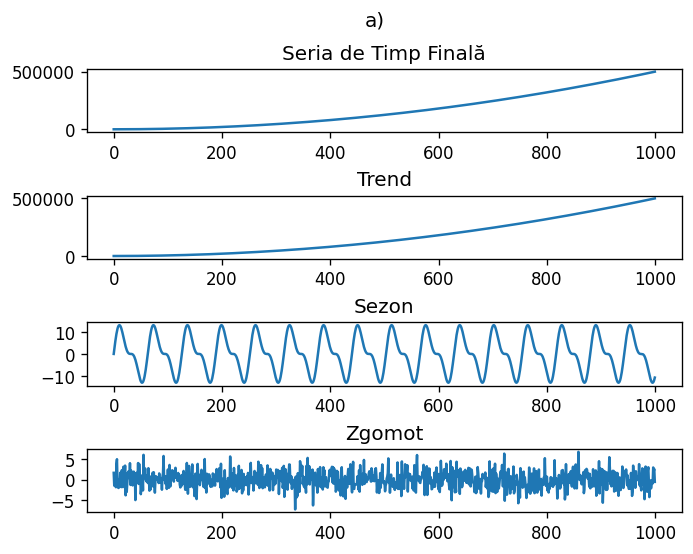

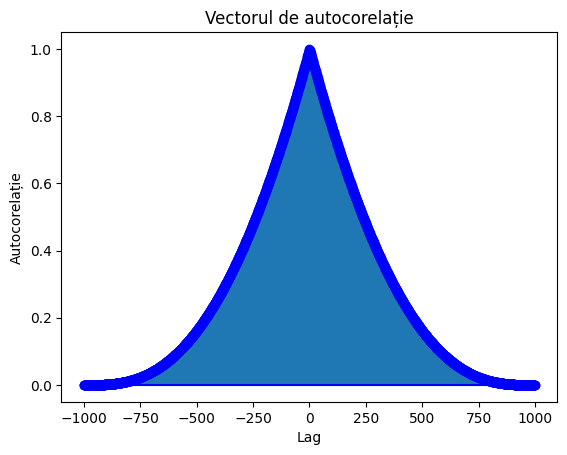

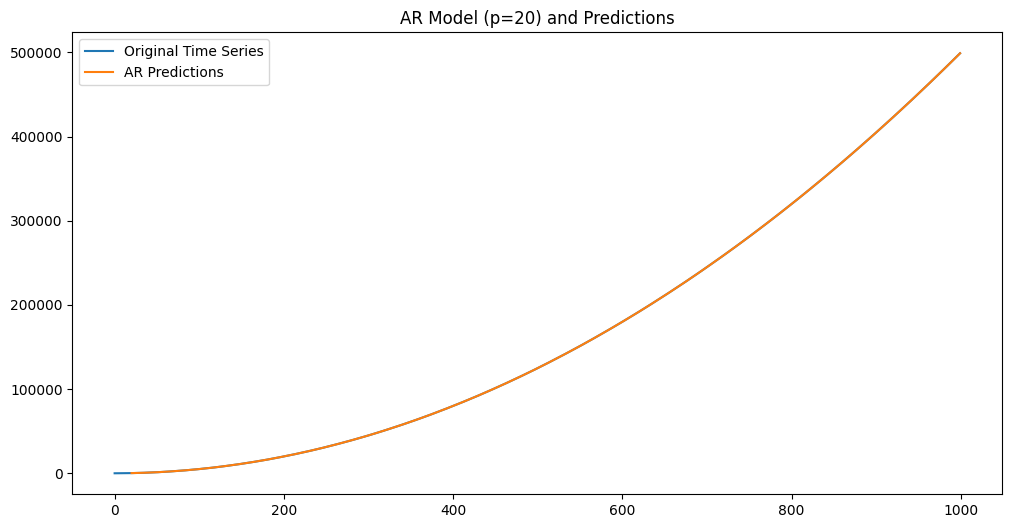

Cea mai bună valoare pentru p este: 3
Cea mai bună valoare pentru m este: 1


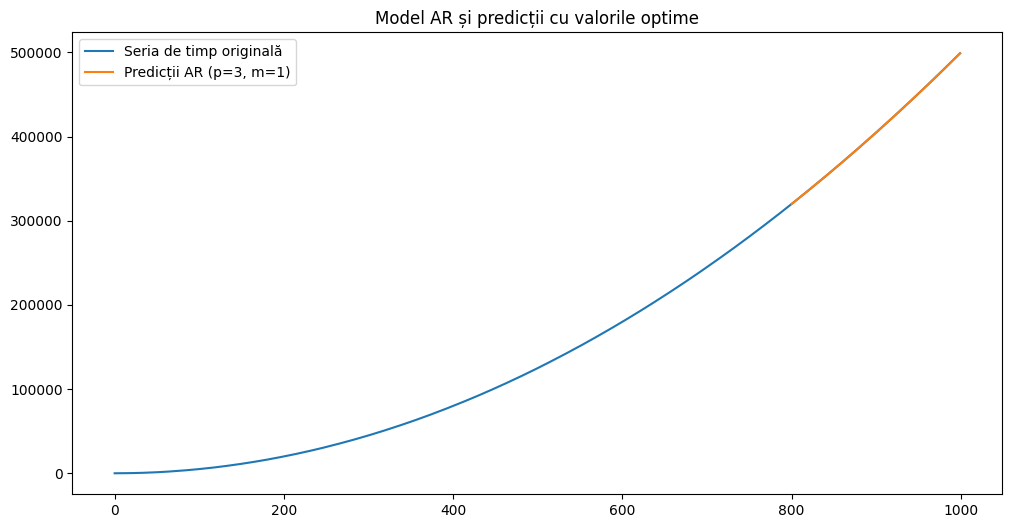

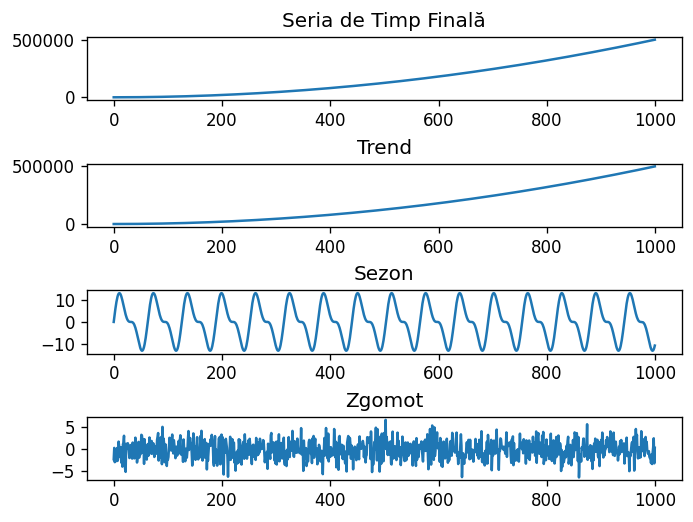

In [2]:
# a)
import sys
sys.path.append('../Laborator 8')
from lab8 import generate_noise, generate_season, generate_time_series, generate_trend

N = 1000
t = np.arange(N)

time_series = generate_time_series(t)

fig, ax = plt.subplots(4, dpi=120)
ax[0].set_title("Seria de Timp Finală")
ax[0].plot(time_series)
ax[1].set_title("Trend")
ax[1].plot(generate_trend(np.arange(N)))
ax[2].set_title("Sezon")
ax[2].plot(generate_season(np.arange(N)))
ax[3].set_title("Zgomot")
ax[3].plot(generate_noise(np.arange(N), sigma=2))
plt.subplots_adjust(hspace=1)
plt.show()

C:\Users\lucac\AppData\Local\Temp\ipykernel_15632\36592731.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  result = [alpha * np.sum(((1 - alpha) ** i) * series[t - i] + ((1 - alpha)**t) * series[0] for i in range(t - 1)) for t in range(len(series))]
C:\Users\lucac\AppData\Local\Temp\ipykernel_15632\36592731.py:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum((smoothed_series[t] - series[t + 1]) ** 2 for t in range(N - 2))


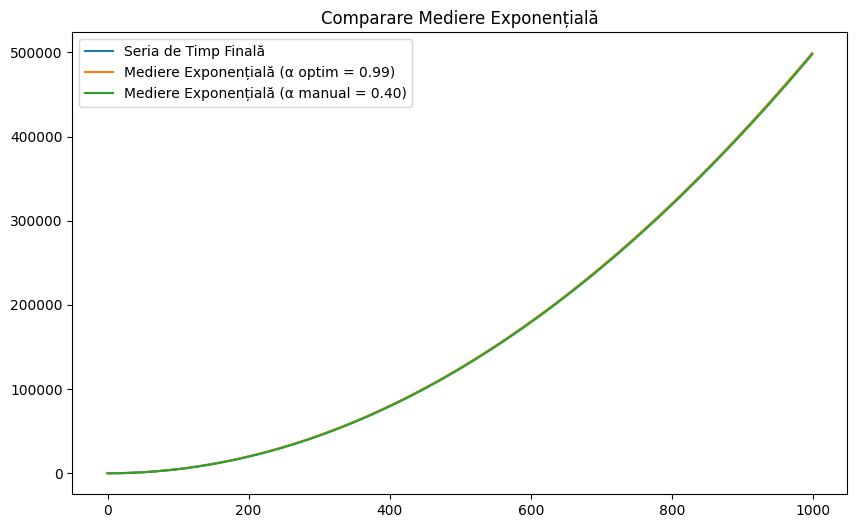

In [7]:
# Definirea funcției de mediere exponențială modificată
def exponential_smoothing_modified(series, alpha):
    # result = [alpha * np.sum(((1 - alpha) ** i) * series[t - i] for i in range(t)) + ((1 - alpha) ** t) * series[0] for t in range(len(series))]
    result = [alpha * np.sum(((1 - alpha) ** i) * series[t - i] + ((1 - alpha)**t) * series[0] for i in range(t - 1)) for t in range(len(series))]
    return result

# Definirea funcției obiectiv pentru minimizare
def objective_function(alpha, series):
    smoothed_series = exponential_smoothing_modified(series, alpha)
    # return np.sum((smoothed_series[:-1] - series[1:]) ** 2)
    return np.sum((smoothed_series[t] - series[t + 1]) ** 2 for t in range(N - 2))

# Căutare grid pentru α
alpha_values = np.linspace(0.01, 0.99, 100)
mae_values = [objective_function(alpha, time_series) for alpha in alpha_values]

# Găsirea valorii α care minimizează funcția obiectivă
optimal_alpha = alpha_values[np.argmin(mae_values)]

# Aplicare mediere exponențială cu α optim
smoothed_series_optimal = exponential_smoothing_modified(time_series, optimal_alpha)

# Plot pentru medierea exponențială cu α ales manual
alpha_manual = 0.4  # Alegeți valoarea α manual
smoothed_series_manual = exponential_smoothing_modified(time_series, alpha_manual)

# Vizualizarea rezultatelor pe același grafic
plt.figure(figsize=(10, 6))
plt.title("Comparare Mediere Exponențială")
plt.plot(time_series, label="Seria de Timp Finală")
plt.plot(smoothed_series_optimal, label=f"Mediere Exponențială (α optim = {optimal_alpha:.2f})")
plt.plot(smoothed_series_manual, label=f"Mediere Exponențială (α manual = {alpha_manual:.2f})")

plt.legend()
plt.show()